<img src="../images/5thNRST_logo.png" alt="NOWPAP" width="900" height="700">

## NOWPAP REMOTE SENSING TRAINING COURSE   
#### Webinar 2: Monitoring and Assessment of Water Quality by Ocean Color Remote Sensing
<span style="color:brown; font-size:1.1em;font-style:italic">Time series analysis: data download</span>

<hr style="border:2px solid rgb(30,70,125)"> </hr>

<span style="font-family:Helvieta; font-size:2em;">Genki Terauchi and Eligio Maure </span>

<span style="font-family:Helvieta; font-size:1em;">Please contact terauchi@npec.or.jp for inquiries. </span>

***
**Note 1**: Execute each cell through the <button class="btn btn-default btn-xs"><i class="icon-play fa fa-play"></i></button> button from the top MENU (or keyboard shortcut `Shift` + `Enter`).<br>
<br>
**Note 2**: If, for any reason, the kernel is not working anymore, in the top MENU, click on the <button class="btn btn-default btn-xs"><i class="fa fa-repeat icon-repeat"></i></button> button. Then, in the top MENU, click on "Cell" and select "Run All Above Selected Cell".<br>
***

# Table of contents
- [1. Purpose](#1.-Purpose)
- [2. Library import](#2.-Library-import)
- [3. Define parameters](#3.-Define-parameters)
- [4. Point extract](#4.-Point-extract)
- [5. Region extract](#5.-Region-extract)
- [6. Resources](#6.-Resources)
***

# 1. Purpose
[Return to the "Table of contents"](#Table-of-contents)

The objective of this exercise is to learn how to extract the mean of a point or region from a series of satellite images.  
The images used are obtained from the [Marine Environmental Watch](https://ocean.nowpap3.go.jp/?page_id=862) of Northwest Pacific Action Plan (NOWPAP).

***

# 2. Library import
[Return to the "Table of contents"](#Table-of-contents)

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# System
import sys
from pathlib import Path

# Visualization
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
sys.path.append(str(Path('.').absolute().parent)) 
import sutilsx as util
util.mpl_custom(mpl=plt)

# 3. Define parameters
[Return to the "Table of contents"](#Table-of-contents)

In [3]:
VAR = 'chlor_a'    # variable name 

INTPUT_DIR = Path('.').absolute().joinpath(r'data/SGLI/month')
OUTPUT_DIR = Path('.').absolute().joinpath(r'data/SGLI/month')

INPUT_FILES = list(INTPUT_DIR.glob('GS2020*.nc'))

# 4. Point extract
[Return to the "Table of contents"](#Table-of-contents)
- Get annual time series from a point 

In [6]:
#Specifing geolocation point to extract data and area around the point
#%%time
point = {'lon': [137.253], 'lat': [36.793]} # geolocation
window = 5 # pixel around the centre point, extract window
save_to = OUTPUT_DIR.joinpath('point_timeseries.txt')

util.pyextract(bbox=point, window=window, filename=save_to, file_list=INPUT_FILES)

In [7]:
#Reading created csv file from previous cell
df = pd.read_csv(save_to)
df.head()

,filename,time_start,time_end,pixel_count,valid,invalid,min,max,mean,median,std,pixel_value
0,GS202001_CHL_TB_month.nc,20200101T000000Z,20200131T000000Z,25,25,0,1.256692,2.356800,1.863711,2.049600,1.235028,2.148800
1,GS202006_CHL_TB_month.nc,20200601T000000Z,20200630T000000Z,25,25,0,2.998447,6.383039,3.699990,3.502832,1.200608,3.708431
2,GS202009_CHL_TB_month.nc,20200901T015918Z,20200930T015732Z,25,25,0,1.312052,6.704495,2.634364,2.293229,1.466066,2.156018
3,GS202010_CHL_TB_month.nc,20201001T020426Z,20201031T013551Z,25,25,0,0.765807,1.044894,0.958000,0.989837,1.080136,0.980657
4,GS202007_CHL_TB_month.nc,20200701T020837Z,20200731T021355Z,25,25,0,3.038400,7.108799,5.673278,6.107200,1.217933,6.393600


.


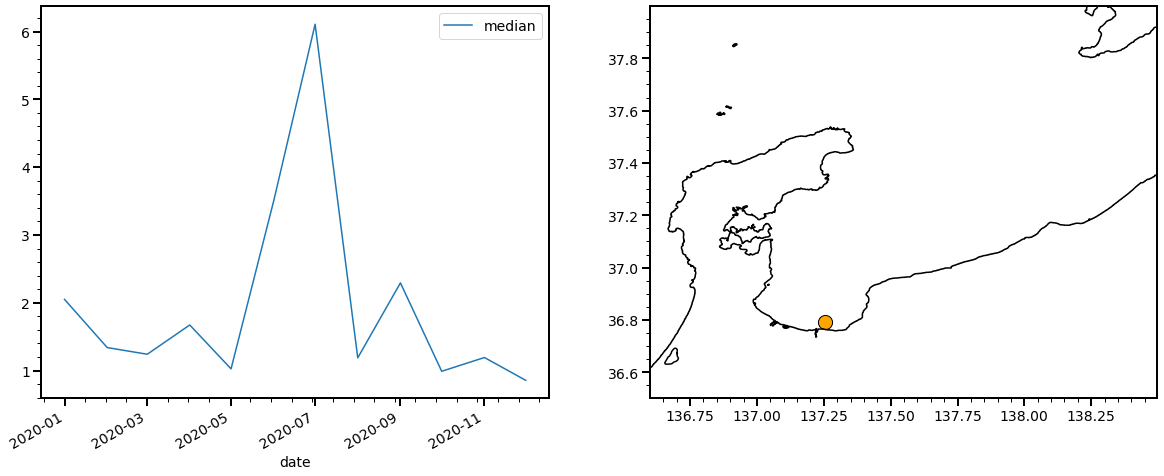

In [8]:
# Allocating areas to display graphs with matplotlib
fig, ax = plt.subplots(1,2, figsize=(20,8))

#Read the created csv file and plot median value
df['date'] = pd.to_datetime(df['time_start'])
df.plot(x='date', y='median', ax=ax[0])

#Display the area of interest with the point
util.add2map(file=INPUT_FILES[0], point=point, ax=ax[1])

# 5. Region extract
[Return to the "Table of contents"](#Table-of-contents)
- Define a box in Toyama Bay and try to get the time series 

.


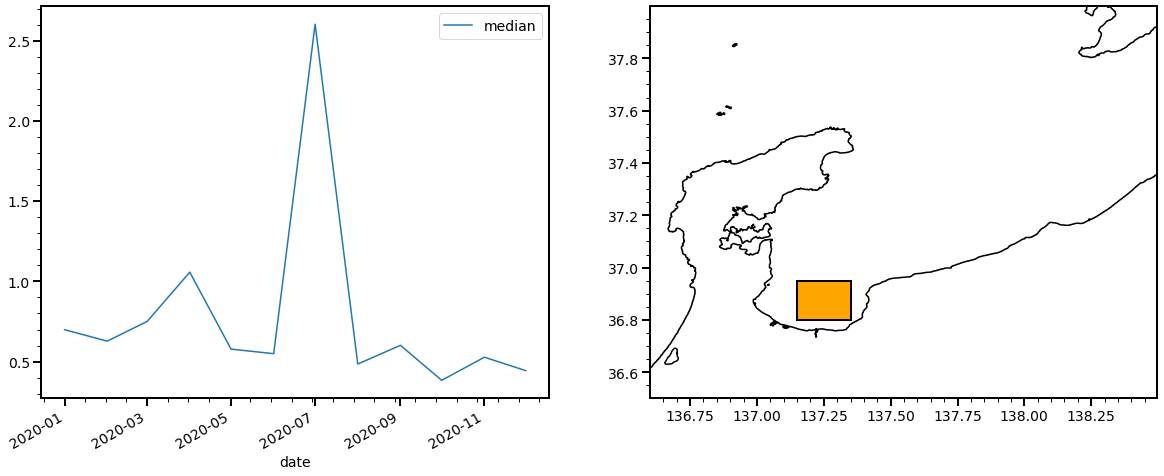

In [11]:
#Specifing geolocation area by coordinates to extract data and save the result in csv file
#%%time
fig, ax = plt.subplots(1,2, figsize=(20,8))

bbox = {'lon': [137.15, 137.35], 'lat': [36.8, 36.95]} # geolocation
save_to = OUTPUT_DIR.joinpath('region_timeseries.txt')
util.pyextract(bbox=bbox, filename=save_to, file_list=INPUT_FILES)

#Read the created csv file and plot median value
df = pd.read_csv(save_to)
df['date'] = pd.to_datetime(df['time_start'])
df.plot(x='date', y='median', ax=ax[0])

#Display the area of interest with the region
util.add2map(file=INPUT_FILES[0], region=bbox, ax=ax[1])

<div class="alert alert-block alert-success"/div>
    <b>Done!</b><br>
  
--- 

#### And thank you for your attention! :)
    We hope you enjoyed the training provided by NOWPAP CEARAC.

# 5. Resources
[Go back to the "Table of contents"](#Table-of-contents)
1. https://matplotlib.org/stable/tutorials/advanced/path_tutorial.html
2. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
4. https://ocean.nowpap3.go.jp/?page_id=862
5. https://github.com/npec/5th-NOWPAP-Training-Course-on-Remote-Sensing-Data-Analysis